In [50]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.nn import Linear,ReLU,CrossEntropyLoss
import torchvision
from torch.utils.data import DataLoader,Dataset
from torchvision.datasets import FashionMNIST
import torchvision.transforms as transforms



In [51]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [52]:
print(torch.__version__)

2.0.1+cu117


In [53]:
dataset_fmnist = FashionMNIST(root='G:/py-py-py-pytorch/cnn/data/',
                              train=True,
                              download=True)

<class 'tuple'>


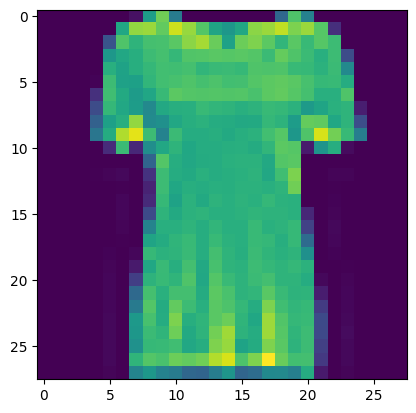

In [54]:
print(type(dataset_fmnist[10]))

img, label = dataset_fmnist[10]

plt.imshow(img)

In [55]:
features, labels = dataset_fmnist.data, dataset_fmnist.targets

In [56]:
print(len(dataset_fmnist))
print(features.shape)

60000
torch.Size([60000, 28, 28])


In [57]:
labels.unique()

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

label_x_row =  [    1     2     4 ... 59974 59985 59998]
label_x_row =  [   16    21    38 ... 59989 59991 59996]
label_x_row =  [    5     7    27 ... 59977 59981 59993]
label_x_row =  [    3    20    25 ... 59971 59980 59997]
label_x_row =  [   19    22    24 ... 59984 59986 59990]
label_x_row =  [    8     9    12 ... 59983 59995 59999]
label_x_row =  [   18    32    33 ... 59973 59987 59988]
label_x_row =  [    6    14    41 ... 59951 59979 59992]
label_x_row =  [   23    35    57 ... 59962 59967 59994]
label_x_row =  [    0    11    15 ... 59932 59970 59978]


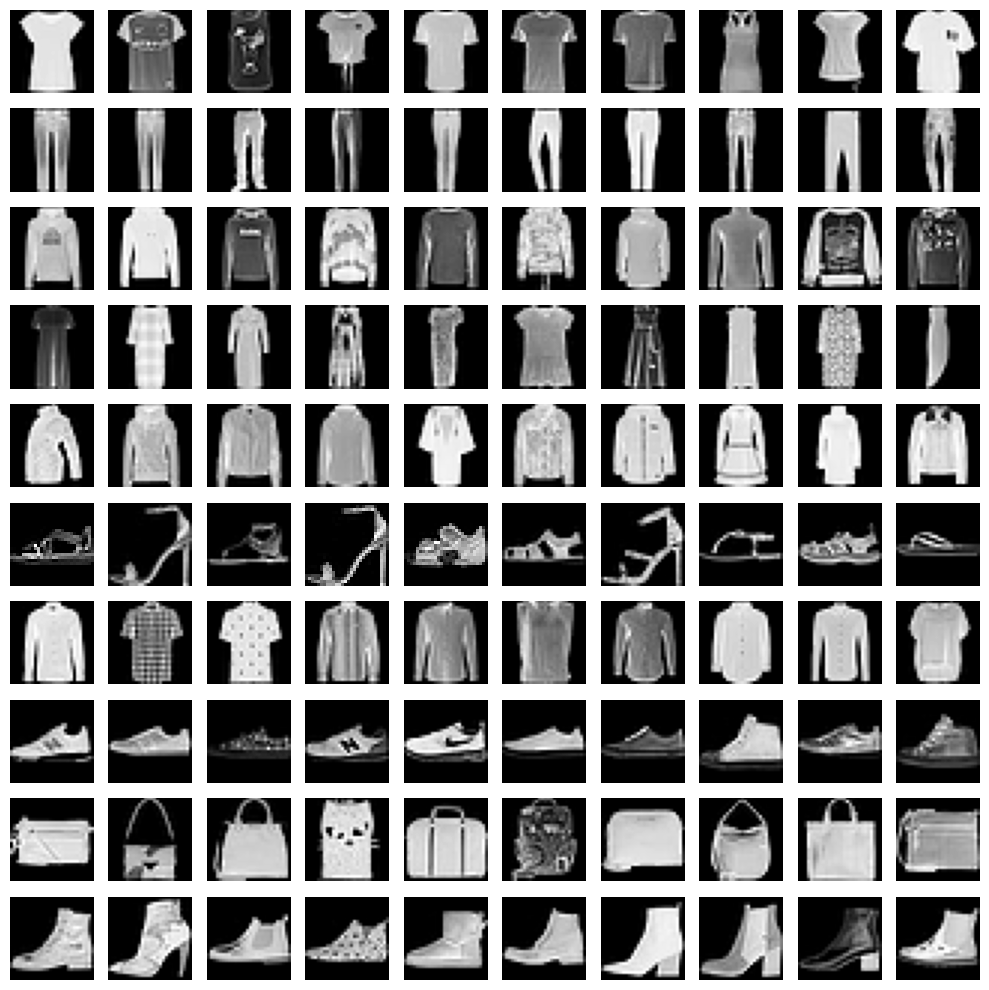

In [58]:
row,col = 10,10
fig, ax = plt.subplots(row,col,figsize=(10,10))

for l,row_val in enumerate(ax):
    label_x_row = np.where(labels == l)[0]
    print("label_x_row = ",label_x_row )

    for cell in row_val:
        cell.grid(False)
        cell.axis('off')

        random_image_idx = np.random.choice(label_x_row)

        x,y = features[random_image_idx],labels[random_image_idx]
        cell.imshow(x,cmap='gray')

plt.tight_layout()

In [59]:
#Building the neural network

In [60]:
#3 functions - init, getitem and len

In [61]:
class DatasetTransformer(Dataset):
    def __init__(self,x,y):
        '''Takes 2 tensors x and y'''
        x = x.float()
        x = x.view(-1,28*28) #Flattem - to convert into 1-d input tensor. Unless flattened all info can't be extracted
        self.x = x
        self.y = y

    def __getitem__(self, index):
        x = self.x[index]
        y = self.y[index]
        # model should reside in the same device either cpu or gpu
        return x.to(device), y.to(device)
    
    def __len__(self):
        return len(self.x)

In [62]:
#create a dataloader

def loadData():
    train_data = DatasetTransformer(features,labels)
    Dloader = DataLoader(train_data,batch_size=16,shuffle=True)
    return Dloader

In [63]:
from torch.optim import SGD


In [64]:
def NeuralNetwork():
    model = nn.Sequential(
        Linear(in_features=28*28,out_features=1280),
        ReLU(),
        Linear(1280,10)
    ).to(device)
    loss_fn = CrossEntropyLoss()
    opt = SGD(model.parameters(),lr=0.001)
    return model,loss_fn,opt

In [65]:
def train_model(x,y,model,optimizer,loss_fn):
    model.train()

    prediction = model(x)
    loss = loss_fn(prediction,y)
    loss.backward()

    optimizer.step() # upadtes
    optimizer.zero_grad() #flushes out previous gradients

    return loss.item()

In [66]:
def metrics(x,y,model):
    '''Accuracy or any other metric'''
    model.eval()

    pred_matrix = model(x)
    max_values, argmaxes = pred_matrix.max(-1)
    is_correct = argmaxes == y
    return is_correct.numpy().tolist()

In [73]:
training_data_loader = loadData()
model,loss_fn, optimizer = NeuralNetwork()

In [74]:
losses = []
num_epochs = 15
for epoch in range(num_epochs):
    print("Running Epoch {}".format(epoch))
    curr_epoch_loss = []
    for idx,batch in enumerate(iter(training_data_loader)):
        x,y = batch
        
        batch_loss = train_model(x,y,model,optimizer,loss_fn)
        curr_epoch_loss.append(batch_loss)

    mean_epoch_loss = np.array(curr_epoch_loss).mean()
    losses.append(mean_epoch_loss)

Running Epoch 0
Running Epoch 1
Running Epoch 2
Running Epoch 3
Running Epoch 4
Running Epoch 5
Running Epoch 6
Running Epoch 7
Running Epoch 8
Running Epoch 9
Running Epoch 10
Running Epoch 11
Running Epoch 12
Running Epoch 13
Running Epoch 14


In [75]:
for loss in losses:
    print(round(loss,2))

0.93
0.43
0.39
0.35
0.33
0.31
0.3
0.29
0.28
0.27
0.26
0.25
0.25
0.24
0.23


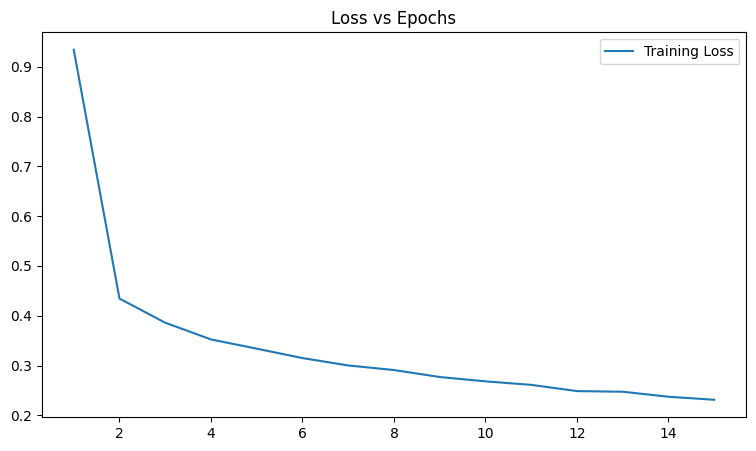

In [76]:
epoch = np.arange(num_epochs)+1
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.title("Loss vs Epochs")
plt.plot(epoch,losses,label="Training Loss")
plt.legend()
plt.show()